# Project - Airline AI Assistant

We'll create an AI Customer Support assistant for an Airline, which simulates booking flights, and translate the conversation in language of choice. It can also create a vibrant image representing the city you want to book flights for. 

In [ ]:
# imports

import os
import json
from dotenv import load_dotenv
from openai import OpenAI

In [2]:
# Initialization

load_dotenv(override=True)

openai_api_key = os.getenv('OPENAI_API_KEY')
if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
MODEL = "gpt-4o-mini"
openai = OpenAI()

OpenAI API Key exists and begins sk-proj-


In [3]:
system_message = "You are a helpful assistant for an Airline called FlightAI. "
system_message += "Give short, courteous answers, no more than 1 sentence. "
system_message += "Always be accurate. If you don't know the answer, say so."
system_message += "If the customer enquires about a flight, first tell them the price. "
system_message += "Then ask a follow up question if they would like to book the flight."
system_message += "If yes, then book the flight if requested seats are available for the flight."
system_message += "If booked, respond with a Confirmation message, else apologize stating the reason for failed booking."

### Tools

In [ ]:
# Let's start by making a useful function for getting ticket prices for particular cities.

ticket_prices = {"london": "$799", "paris": "$899", "tokyo": "$1400", "berlin": "$499"}

def get_ticket_price(destination_city):
    print(f"Tool get_ticket_price called for {destination_city}")
    city = destination_city.lower()
    return ticket_prices.get(city, "Unknown")

In [5]:
# There's a particular dictionary structure that's required to describe our function:

price_function = {
    "name": "get_ticket_price",
    "description": "Get the price of a return ticket to the destination city. Call this whenever you need to know the ticket price, for example when a customer asks 'How much is a ticket to this city'",
    "parameters": {
        "type": "object",
        "properties": {
            "destination_city": {
                "type": "string",
                "description": "The city that the customer wants to travel to",
            },
        },
        "required": ["destination_city"],
        "additionalProperties": False
    }
}

In [38]:
# Let's create a useful function for booking flight tickets considering number of available seats.

available_seats = {"london": 10, "paris": 50, "tokyo": 3, "berlin": 1}

In [45]:
def book_flight(destination_city, requested_seats):
    city = destination_city.lower()
    avail = available_seats.get(city)
    requested = int(requested_seats)
    if avail is not None and requested<= avail:
        print(f"Seats before booking for {city}: {avail}")
        available_seats[city] -= requested
        print(f"Seats after booking for {city}: {available_seats.get(city)}")
        confirmation = {"message": f"Booking confirmed for {requested_seats} passengers to {city}."}
    else:
        confirmation = {"message": f"Booking failed to {city}. Available seats : {avail}"}
    return confirmation

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../thankyou.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#090;">I have a special request for you</h2>
            <span style="color:#090;">
                My editor tells me that it makes a HUGE difference when students rate this course on Udemy - it's one of the main ways that Udemy decides whether to show it to others. If you're able to take a minute to rate this, I'd be so very grateful! And regardless - always please reach out to me at ed@edwarddonner.com if I can help at any point.
            </span>
        </td>
    </tr>
</table>

In [8]:
book_flight_function = {
    "name": "book_flight",
    "description": "Check if there are seats available on the flight for the requested destination city. If yes, then it reserves the requested number of seats. Call this whenever you need to book the flight, for example when a customer asks 'Can you book the flight' or 'I want to book the flight for N passengers",
    "parameters": {
        "type": "object",
        "properties": {
            "destination_city": {
                "type": "string",
                "description": "The city that the customer wants to travel to",
            },
            "requested_seats": {
                "type": "string",
                "description": "The number of tickets customer wants to book",
            },
        },
        "required": ["destination_city", "requested_seats"],
        "additionalProperties": False
    }
}

In [9]:
# And this is included in a list of tools:

tools = [{"type": "function", "function": price_function},
        {"type": "function", "function": book_flight_function}
         ]

### Image geneartion: DALL-E-3, the image generation model behind GPT-4o

In [14]:
# Some imports for handling images

import base64
from io import BytesIO
from PIL import Image

In [15]:
def artist(city):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=f"An image representing a vacation in {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    # image in coded format
    image_base64 = image_response.data[0].b64_json
    # decode image
    image_data = base64.b64decode(image_base64)
    # return image being opened in bytes
    return Image.open(BytesIO(image_data))

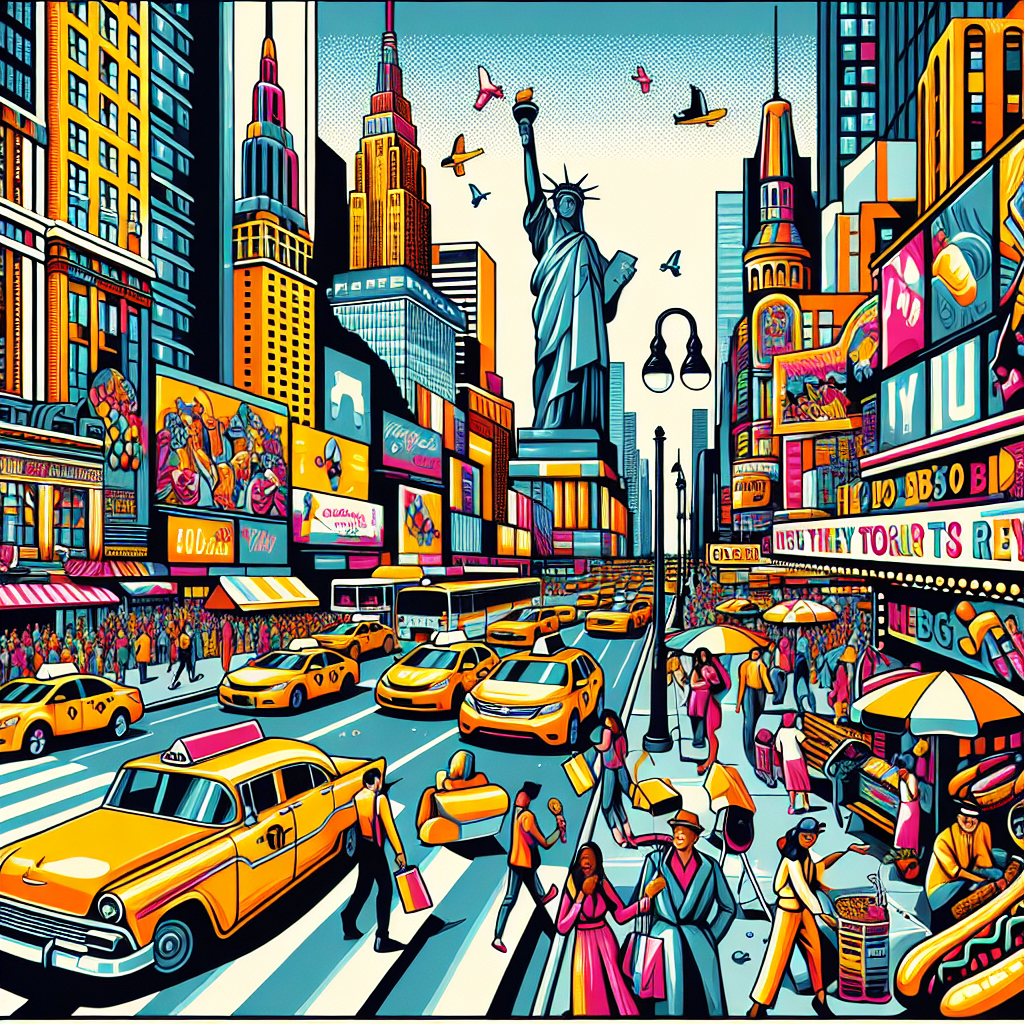

In [14]:
image = artist("New York City")
display(image)

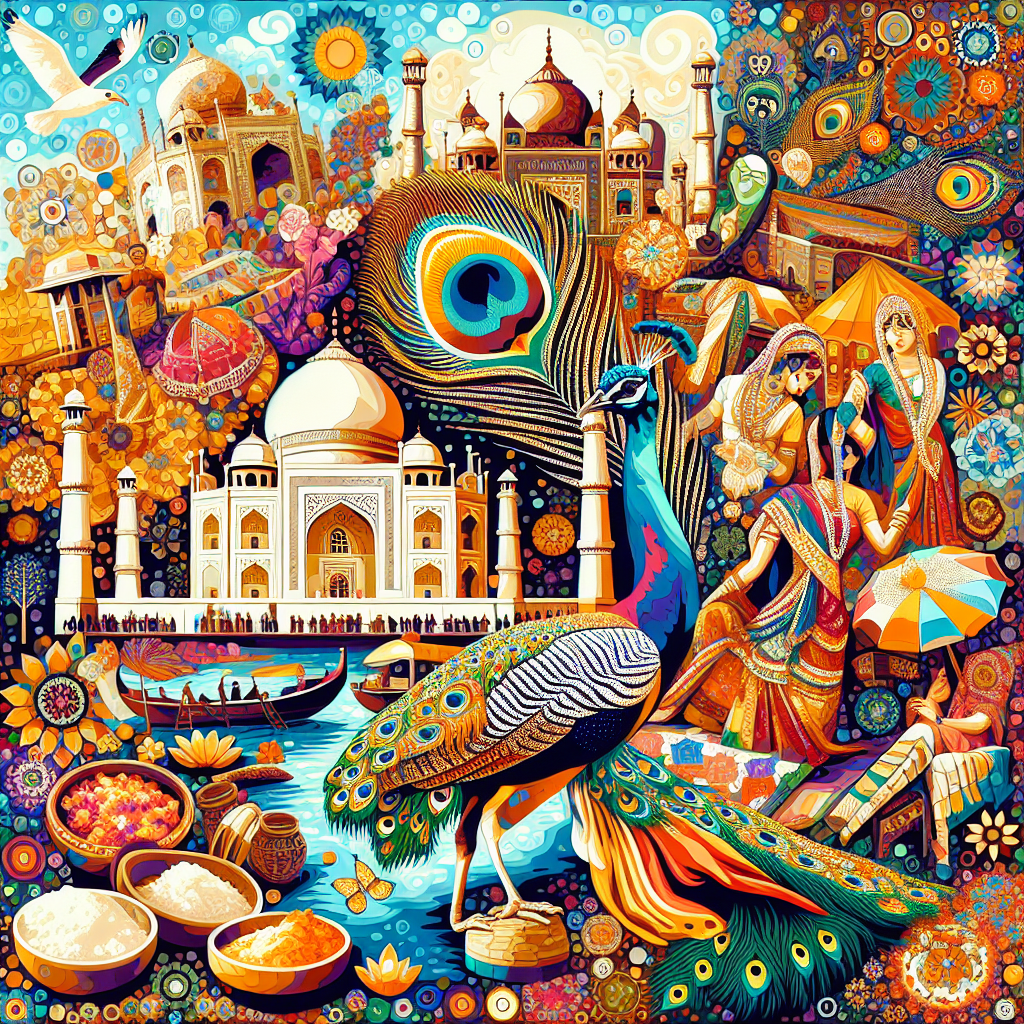

In [15]:
image = artist("India")
display(image)

### Add Audio to the AI Assistant

In [2]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"
#!brew install ffmpeg

In [3]:
!ffmpeg -version
!ffprobe -version
!ffplay -version

ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
built with Apple clang version 16.0.0 (clang-1600.0.26.6)
configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1.1_2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

In [ ]:
from pydub import AudioSegment
from pydub.playback import play

def talker(message):
    response = openai.audio.speech.create(
      model="tts-1",
      voice="onyx",    # Alternative: alloy
      input=message
    )
    
    audio_stream = BytesIO(response.content)
    audio = AudioSegment.from_file(audio_stream, format="mp3")
    play(audio)

## Add an Agent that translates all responses to a different language

In [21]:
!pip install deep-translator

  Using cached deep_translator-1.11.4-py3-none-any.whl.metadata (30 kB)
Using cached deep_translator-1.11.4-py3-none-any.whl (42 kB)


In [22]:
import gradio as gr
from deep_translator import GoogleTranslator

In [51]:
seen_cities = set()
current_image = ''

In [47]:
def chat(history):
    messages = [{"role": "system", "content": system_message}] + history
    response = openai.chat.completions.create(model=MODEL, messages=messages, tools=tools)
    image = None
    global seen_cities, current_image

    if response.choices[0].finish_reason=="tool_calls":
        message = response.choices[0].message
        response, city = handle_tool_call(message)
        messages.append(message)
        messages.append(response)
        if city and city.lower() not in seen_cities:
            seen_cities.add(city.lower())
            current_image = artist(city)
        response = openai.chat.completions.create(model=MODEL, messages=messages)
        
    reply = response.choices[0].message.content
    history += [{"role":"assistant", "content":reply}]

    # Comment out or delete the next line if you'd rather skip Audio for now..
    talker(reply)
    
    return history

In [ ]:
# We have to write that function handle_tool_call:

def handle_tool_call(message):
    tool_call = message.tool_calls[0]
    arguments = json.loads(tool_call.function.arguments)
    city = arguments.get('destination_city')
    seats = arguments.get('requested_seats')
    function_name = tool_call.function.name

    if function_name == "get_ticket_price":
        reply = get_ticket_price(city)
        key = "price"
    elif function_name == "book_flight":
        reply = book_flight(city, seats)
        key = 'booking'
    response = {
        "role": "tool",
        "content": json.dumps({"destination_city": city,key: reply}),
        "tool_call_id": tool_call.id
    }
    return response, city

In [35]:
def translate_messages(messages, target_lang):
    # Convert human language name to ISO code
    lang_map = {
        "French": "fr",
        "Spanish": "es",
        "German": "de",
        "Japanese": "ja"
    }
    lang_code = lang_map.get(target_lang.lower().capitalize(), "en")
    
    translated = []
    for msg in messages:
        try:
            translated_text = GoogleTranslator(source='auto', target=lang_code).translate(msg["content"])
        except Exception as e:
            translated_text = f"[Translation failed: {str(e)}]"
        translated.append({"role": msg["role"], "content": translated_text})
    return translated


In [ ]:
with gr.Blocks() as ui:
    with gr.Row():
        chatbot = gr.Chatbot(height=500, type="messages")
        translated_chatbot = gr.Chatbot(label = 'Translated', height=500, type="messages", show_copy_button=False)
        image_output = gr.Image(height=500)
    with gr.Row():
        language_selector = gr.Dropdown(
            label="Translate to:",
            choices=["French", "Spanish", "German", "Japanese"],
            value="French"
        )
    with gr.Row():
        entry = gr.Textbox(label="Chat with our AI Assistant:")
    with gr.Row():
        clear = gr.Button("Clear")

    def do_entry(message, history):
        history += [{"role":"user", "content":message}]
        return "", history
    
    def update_translation(history, selected_lang):
        return translate_messages(history, selected_lang)
    
    def get_current_image():
        return current_image or 'flightai_default.jpeg'

    entry.submit(
        do_entry,
        inputs=[entry, chatbot],
        outputs=[entry, chatbot]
    ).then(
        chat,
        inputs=chatbot,
        outputs=[chatbot]
    ).then(
        update_translation,
        inputs=[chatbot, language_selector],
        outputs=translated_chatbot
    ).then(
        get_current_image,
        inputs=[],
        outputs=[image_output]
    )

    clear.click(
        lambda: ([], [], seen_cities.clear()),
        inputs=None,
        outputs=[chatbot, translated_chatbot],
        queue=False
    )

ui.launch(inbrowser=True)

* Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


Input #0, wav, from '/var/folders/4t/8lvync_13g92wd301ftf13wr0000gn/T/tmppejzf86x.wav':
  Duration: 00:00:02.06, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s



Tool get_ticket_price called for London


In [53]:
print(available_seats)

{'london': 5, 'paris': 50, 'tokyo': 3, 'berlin': 1}


Input #0, wav, from '/var/folders/4t/8lvync_13g92wd301ftf13wr0000gn/T/tmpb7swkmku.wav':
  Duration: 00:00:05.38, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s


Input #0, wav, from '/var/folders/4t/8lvync_13g92wd301ftf13wr0000gn/T/tmp5kht6l3s.wav':
  Duration: 00:00:02.52, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s



Seats before booking for london: 5
Seats after booking for london: 3


Input #0, wav, from '/var/folders/4t/8lvync_13g92wd301ftf13wr0000gn/T/tmpoejugnlu.wav':
  Duration: 00:00:04.08, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s



Tool get_ticket_price called for Berlin


Input #0, wav, from '/var/folders/4t/8lvync_13g92wd301ftf13wr0000gn/T/tmpdqxg9n6e.wav':
  Duration: 00:00:05.42, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s


Input #0, wav, from '/var/folders/4t/8lvync_13g92wd301ftf13wr0000gn/T/tmpp8dgbweq.wav':
  Duration: 00:00:02.98, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s



Seats before booking for berlin: 1
Seats after booking for berlin: 0


Input #0, wav, from '/var/folders/4t/8lvync_13g92wd301ftf13wr0000gn/T/tmpa5gui4gq.wav':
  Duration: 00:00:03.94, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s
